# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

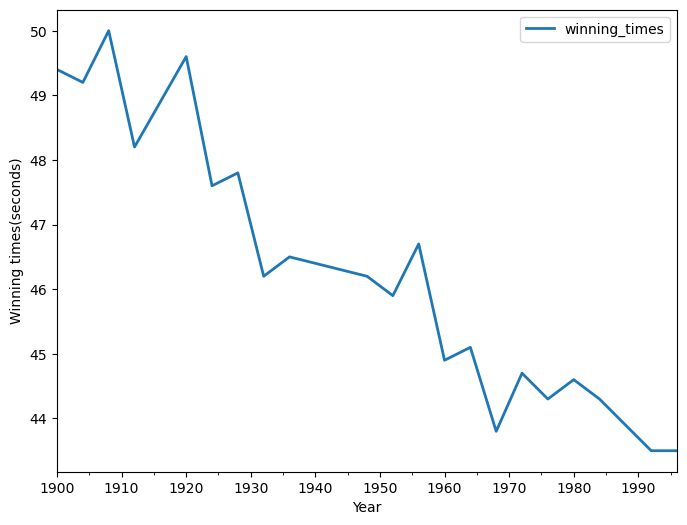

In [8]:
# Plot the time series
data.plot(figsize=(8,6), lw=2)
plt.xlabel('Year')
plt.ylabel('Winning times(seconds)');

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [17]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

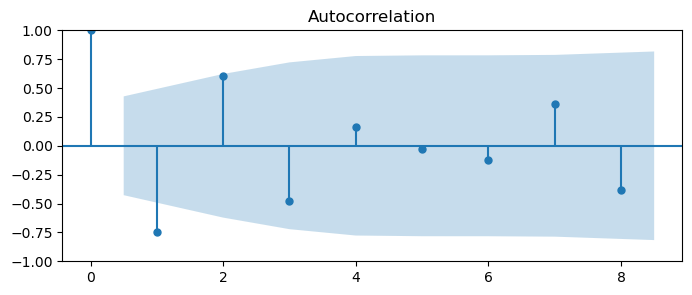

In [18]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_diff, ax=ax, lags=8);

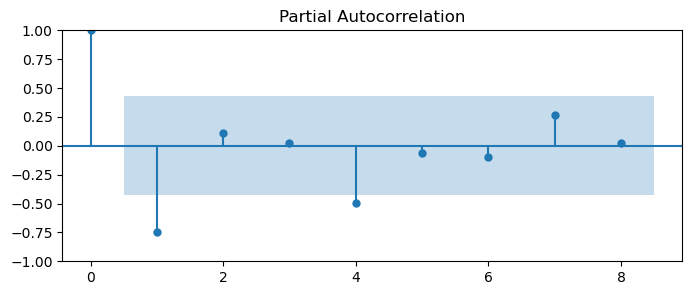

In [19]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [24]:
# import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA (1,0,0) model
mod_arma = ARIMA(data_diff, order = (1, 0, 0))
res_arma = mod_arma.fit()

# print summary information
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Tue, 09 Jul 2024   AIC                             46.107
Time:                        19:08:30   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.034       0.029       0.735
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.84   Prob(JB):                         0.55
Heteroskedasticity (H):               0.33   Skew:                             0.20
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA (2,1) model
mod_arma = ARIMA(data_diff, order = (2, 0, 1))
res_arma = mod_arma.fit()

# print summary information
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Tue, 09 Jul 2024   AIC                             49.862
Time:                        19:11:02   BIC                             55.084
Sample:                    12-31-1904   HQIC                            50.995
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6102      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1280      1.848      0.069      0.945      -3.493       3.749
ma.L1         -0.0208      2.564     -0.008      0.994      -5.046       5.004
sigma2         0.3774      0.181      2.088      0.037       0.023       0.732
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.83   Prob(JB):                         0.55
Heteroskedasticity (H):               0.31   Skew:                             0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA (2,2) model
mod_arma = ARIMA(data_diff, order = (2, 0, 2))
res_arma = mod_arma.fit()

# print summary information
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Tue, 09 Jul 2024   AIC                             44.943
Time:                        19:12:02   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2718      0.103     -2.630      0.009      -0.474      -0.069
ar.L1         -1.7573      0.117    -14.997      0.000      -1.987      -1.528
ar.L2         -0.9180      0.120     -7.667      0.000      -1.153      -0.683
ma.L1          1.5669     46.438      0.034      0.973     -89.450      92.584
ma.L2          0.9985     59.168      0.017      0.987    -114.969     116.966
sigma2         0.2126     12.537      0.017      0.986     -24.360      24.785
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.86   Prob(JB):                         0.65
Heteroskedasticity (H):               0.41   Skew:                            -0.30
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## What is your final model? Why did you pick this model?

The models: ARMA(1,0), ARMA(2,2) and ARMA(2,1) appear to fit the data well and have statistically significant parameters. 

The choice between these models depends on the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) for model selection and hence I opted for the one with fewer parameters. 

The ARMA(1,0) model is the best choice.


## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 